In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import seaborn as sb
sb.set_style('whitegrid')
np.random.seed(1)

In [2]:
data = pd.read_csv('sample_data/insurance.csv')

In [3]:
display(data)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
def plot_data(data):
    num_columns = len(data.columns)
    for i in data.columns:
        plt.figure(figsize = (25,5))
        plt.hist(data[i],edgecolor = 'black',color = 'lightgreen')
        plt.title(i,fontweight='bold')
        plt.show()

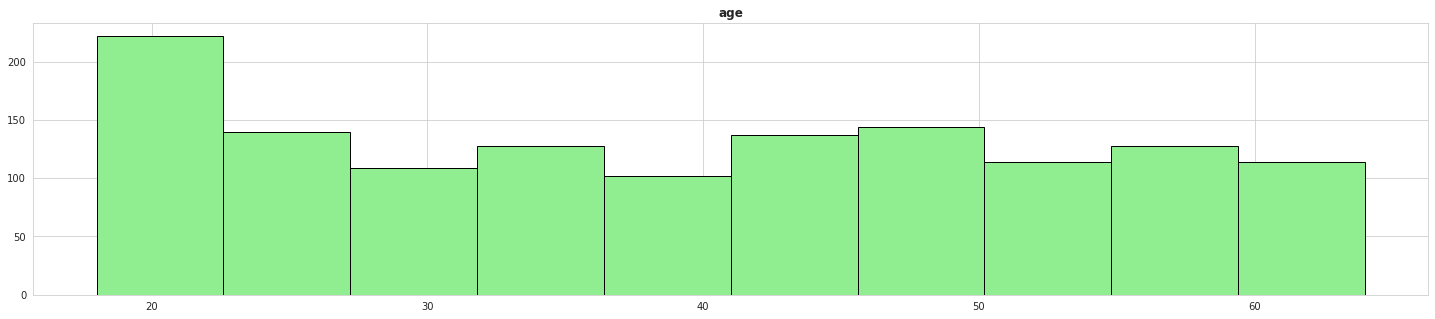

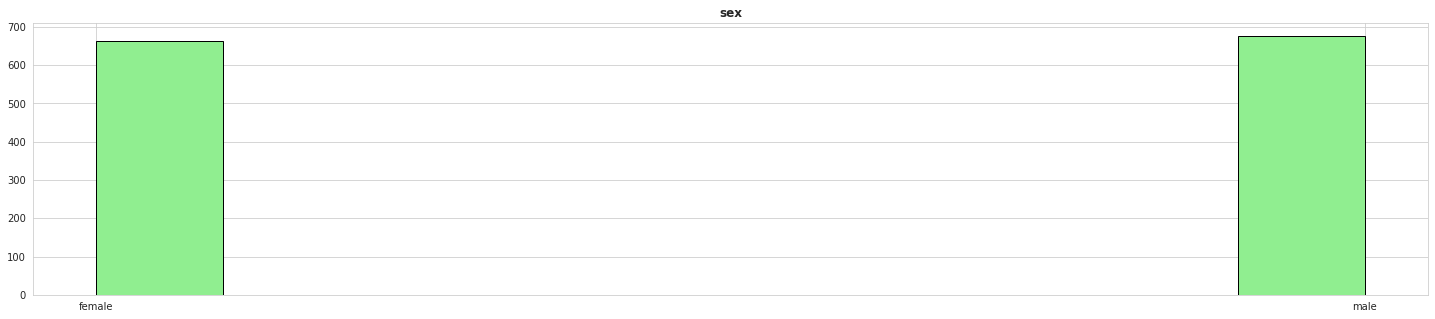

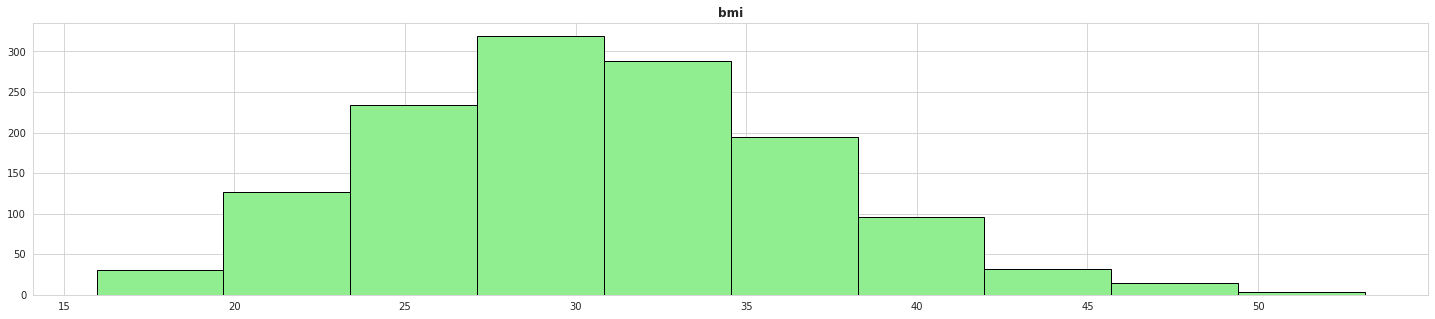

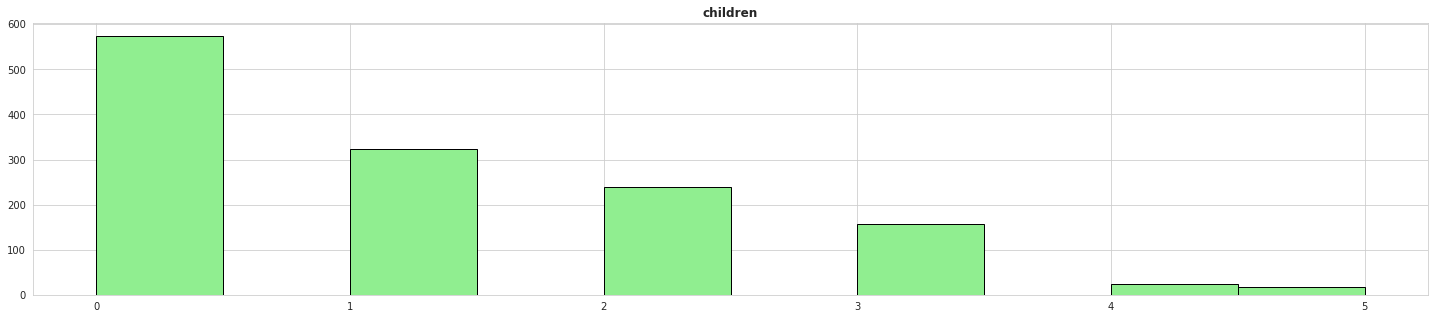

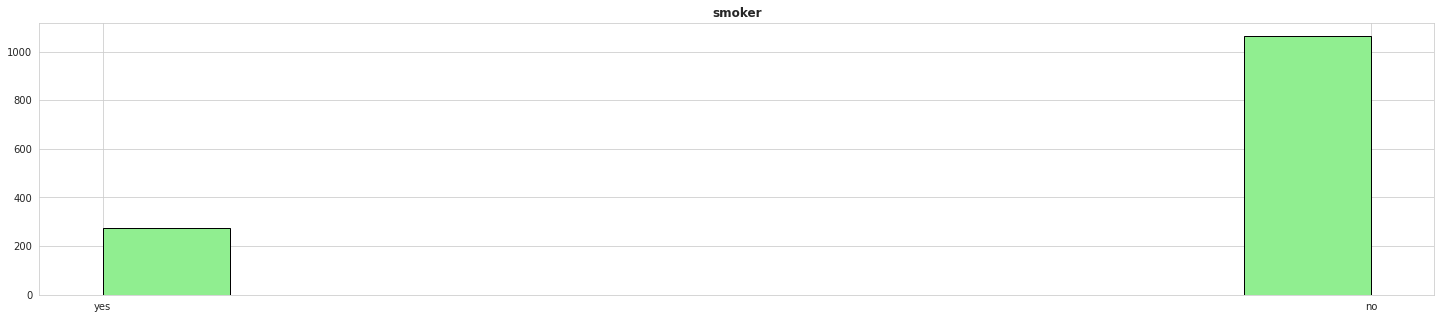

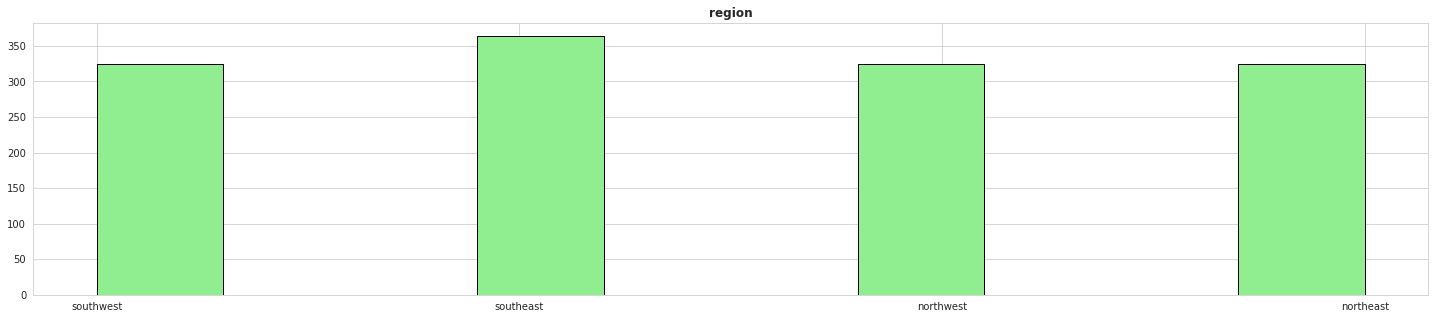

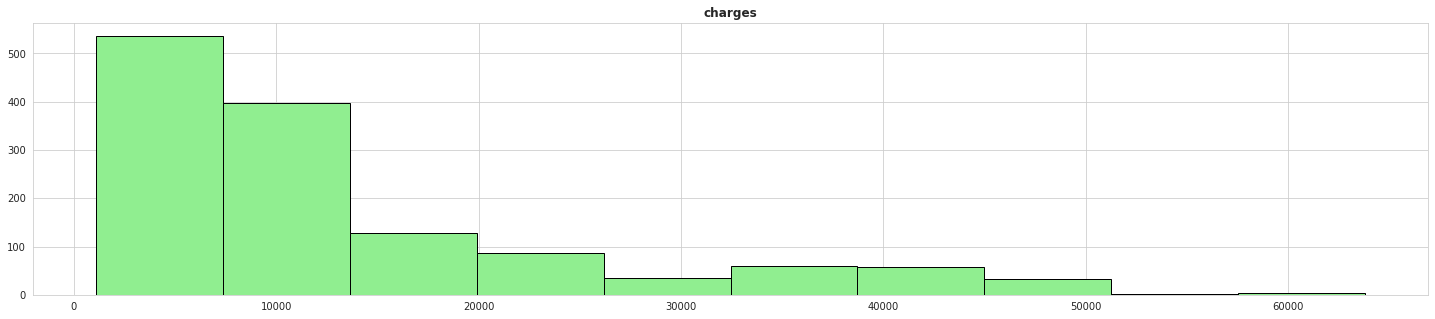

In [5]:
plot_data(data)

In [6]:
def convert_categorical_to_numerical(data,unique_val=10):
    obj_df = data.select_dtypes(include=[object])  
    unique_list = [f for f in obj_df.columns if obj_df[f].unique().shape[0]>=unique_val]
    obj_df_sel = obj_df.drop(columns=unique_list)
    for col in obj_df_sel.columns:
        data[col] = pd.factorize(data[col])[0]
    print("conversion successfull")
    return data

In [7]:
data = convert_categorical_to_numerical(data=data)
display(data)

conversion successfull


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,1,2,10600.54830
1334,18,0,31.920,0,1,3,2205.98080
1335,18,0,36.850,0,1,1,1629.83350
1336,21,0,25.800,0,1,0,2007.94500


In [8]:
display(data.describe().T)

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
sex,1338.0,0.505232,0.500160,0.0000,0.00000,1.000,1.000000,1.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
smoker,1338.0,0.795217,0.403694,0.0000,1.00000,1.000,1.000000,1.00000
region,1338.0,1.484305,1.104885,0.0000,1.00000,1.000,2.000000,3.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [9]:
X = data.iloc[:,:6]
y = data['charges']

In [10]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=1)

In [11]:
def model_performance(model,model_name,x_train = x_train,y_train = y_train,x_test = x_test,y_test = y_test):
    
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    Training_Score = np.round(model.score(x_train,y_train),3)
    Testing_Score = np.round(model.score(x_test,y_test),3)
    
    mse_training = np.round(mean_squared_error(y_train,y_train_pred),3)
    mse_testing = np.round(mean_squared_error(y_test,y_test_pred),3)
    
    mae_training = np.round(mean_absolute_error(y_train,y_train_pred),3)
    mae_testing = np.round(mean_absolute_error(y_test,y_test_pred),3)
    
    r2_training = np.round(r2_score(y_train,y_train_pred),3)
    r2_testing = np.round(r2_score(y_test,y_test_pred),3)
    
    
    print("Model Performance for:",model_name)
    print("")
    
    print("Training Score:",Training_Score)
    print("Testing Score:",Testing_Score)
    print("")
    
    print("Training Data Mean Squared Error:",mse_training)
    print("Testing Data Mean Squared Error:",mse_testing)
    print("")
    
    print("Training Data Mean Absolute Error:",mae_training)
    print("Testing Data Mean Absolute Error:",mae_testing)
    print("")
    
    print("Training Data r2_score:",r2_training)
    print("Testing Data r2_score:",r2_testing)
    print("")
    
    print("Residual Analysis:")
    plt.figure(figsize = (20,5))
    plt.scatter(y_train,(y_train-y_train_pred),color = "red",label = 'Training Predictions')
    plt.scatter(y_test,(y_test-y_test_pred),color = "green",label = 'Testing Predictions')
    plt.legend()
    plt.show()
    
    return Training_Score,Testing_Score,mse_training,mse_testing,mae_training,mae_testing,r2_training,r2_testing

In [12]:
model1 = LinearRegression()
model1.fit(x_train,y_train)

LinearRegression()

Model Performance for: LinearRegression()

Training Score: 0.755
Testing Score: 0.734

Training Data Mean Squared Error: 36849010.767
Testing Data Mean Squared Error: 35807072.806

Training Data Mean Absolute Error: 4184.857
Testing Data Mean Absolute Error: 4019.637

Training Data r2_score: 0.755
Testing Data r2_score: 0.734

Residual Analysis:


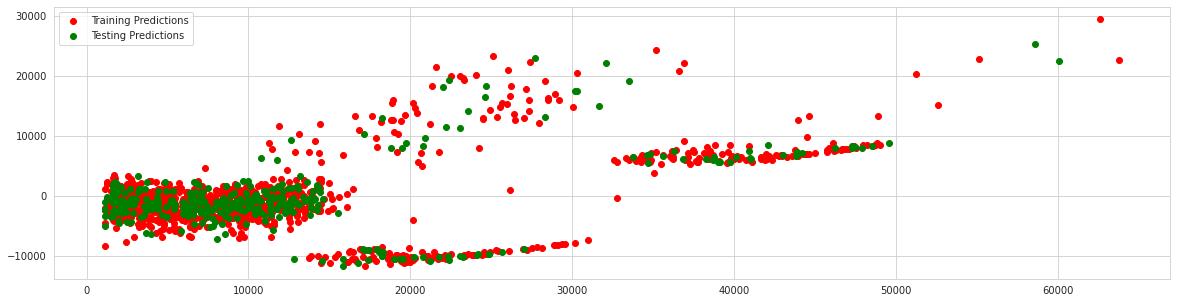

In [13]:
Linear_regression_performance = model_performance(model1,model_name = model1)

In [19]:
import pickle

with open('./model.pkl', 'wb') as model_pkl:
  pickle.dump(model1, model_pkl)

In [27]:
import os

scores = {} #проверка на "пустоту" файла
if os.path.getsize('./model.pkl') > 0:      
    with open('./model.pkl', "rb") as f:
        unpickler = pickle.Unpickler(f)
        scores = unpickler.load()

In [33]:
import pickle
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

with open('./model.pkl', 'rb') as model_pkl:
   model1 = pickle.load(model_pkl)
   
unseen = np.array([[18, 1, 33.700, 1, 1, 1]])
result = model1.predict(unseen)

print('Predicted result for observation ' + str(unseen) + ' is: ' + str(result))

Predicted result for observation [[18.   1.  33.7  1.   1.   1. ]] is: [3706.40022746]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
